In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
# Load benchmark MFPTs from computed data
MFPTs_Benchmark = np.zeros((9,9))
for i in range(9):
    originState = str(i)
    for j in range(9):
        if (j != i):
            finalState = str(j)
            fname = '../data/asym3D/MFPTS/' + originState + 'to' + finalState + '_10000runs_0.001dt_2sf.p'
            MFPT = pickle.load( open( fname, "rb" ) )
            MFPTs_Benchmark[i,j] = np.mean(MFPT)

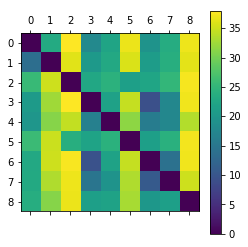

In [9]:
# Plot MFPTs for benchmark
plt.matshow(MFPTs_Hybrid)
plt.colorbar()

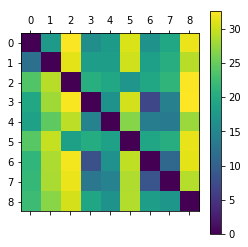

In [3]:
# Plot MFPTs for benchmark
plt.matshow(MFPTs_Benchmark)
plt.colorbar()

In [5]:
# Load hybrid model MFPTs 
MFPTs_Hybrid = np.zeros((9,9))
for i in range(9):
    originState = str(i)
    for j in range(9):
        if (j != i):
            finalState = str(j)
            fname = '../data/asym3D/MFPTS/hybrid/' + originState + 'to' + finalState + '_10000runs_hybrid_box_dt0.01_exitCompensation.p'
            MFPT = pickle.load( open( fname, "rb" ) )
            MFPTs_Hybrid[i,j] = np.mean(MFPT)

/home/maojrs/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


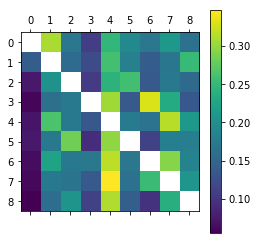

In [20]:
# Plot MFPTs errors
plt.matshow((MFPTs_Hybrid - MFPTs_Benchmark)/MFPTs_Benchmark)
plt.colorbar()
#plt.clim([0,0.3])

In [ ]:
fname = '../data/asym3D/MFPTS/hybrid/0to6_1runs_hybrid_box_dt0.01_exitCompensation.p'
MFPT = pickle.load( open( fname, "rb" ) )


In [ ]:
MFPT